In [20]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stat
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

#import dataset
df = pd.read_csv("SouthAfricaCrimeStats_v2.csv")

#Name of columns
print('list of features:', df.columns.values)

list of features: ['Province' 'Station' 'Category' '2005-2006' '2006-2007' '2007-2008'
 '2008-2009' '2009-2010' '2010-2011' '2011-2012' '2012-2013' '2013-2014'
 '2014-2015' '2015-2016']


In [21]:
# top 10 records
df.head(10)

,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,6093,4602,3761,3610,3267,3037,2886,2638,2809,3050,2434
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635
3,Free State,Park Road,All theft not mentioned elsewhere,5108,4282,3834,3316,3101,3013,2679,3116,2927,2297,2103
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,5099,4536,3309,2694,2616,2606,2635,3226,3246,2892,3030
5,North West,Rustenburg,All theft not mentioned elsewhere,4239,4173,3398,3388,2737,2117,2139,1914,1897,1868,1862
6,Kwazulu/Natal,Durban Central,All theft not mentioned elsewhere,4162,4529,3499,3353,3183,2933,3219,3418,3390,2872,2865
7,Gauteng,Brooklyn,All theft not mentioned elsewhere,3931,3583,2878,2568,2415,2162,2050,1883,2442,2200,2107
8,Gauteng,Booysens,All theft not mentioned elsewhere,3681,3277,2849,2603,2580,3107,2568,1339,1290,1039,943
9,Gauteng,Hillbrow,All theft not mentioned elsewhere,3489,2914,3093,2706,2250,2298,2051,1835,1610,1607,1618


In [22]:
# bottom 10 records
df.tail(10)

,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
30851,Limpopo,Westenburg,All theft not mentioned elsewhere,0,0,0,0,0,0,0,698,758,644,691
30852,Free State,Zamdela,Common assault,0,0,0,0,0,0,567,649,756,562,692
30853,Gauteng,Mamelodi East,Assault with the intent to inflict grievous bo...,0,489,834,774,797,588,645,650,664,766,732
30854,Gauteng,Diepsloot,Assault with the intent to inflict grievous bo...,0,0,0,0,0,156,590,594,612,528,776
30855,Kwazulu/Natal,Kwamashu E,Shoplifting,0,0,0,0,0,170,364,439,468,829,802
30856,Western Cape,Belhar,All theft not mentioned elsewhere,0,0,250,837,710,746,839,762,882,1015,829
30857,Gauteng,Moffatview,All theft not mentioned elsewhere,0,0,0,0,0,0,0,1012,1195,1294,991
30858,Western Cape,Belhar,Drug-related crime,0,0,54,238,291,583,840,1117,1197,1237,1401
30859,Western Cape,Lentegeur,All theft not mentioned elsewhere,0,0,0,0,0,0,0,0,1300,2346,1989
30860,Western Cape,Lentegeur,Drug-related crime,0,0,0,0,0,0,0,0,1126,1933,2050


In [23]:
#prints dataframe attributes data types in series
print(df.dtypes)

Province     object
Station      object
Category     object
2005-2006     int64
2006-2007     int64
2007-2008     int64
2008-2009     int64
2009-2010     int64
2010-2011     int64
2011-2012     int64
2012-2013     int64
2013-2014     int64
2014-2015     int64
2015-2016     int64
dtype: object


In [24]:
# number of rows and columns in dataframe
df.shape

(30861, 14)

In [25]:
#check data types of each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30861 entries, 0 to 30860
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Province   30861 non-null  object
 1   Station    30861 non-null  object
 2   Category   30861 non-null  object
 3   2005-2006  30861 non-null  int64 
 4   2006-2007  30861 non-null  int64 
 5   2007-2008  30861 non-null  int64 
 6   2008-2009  30861 non-null  int64 
 7   2009-2010  30861 non-null  int64 
 8   2010-2011  30861 non-null  int64 
 9   2011-2012  30861 non-null  int64 
 10  2012-2013  30861 non-null  int64 
 11  2013-2014  30861 non-null  int64 
 12  2014-2015  30861 non-null  int64 
 13  2015-2016  30861 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 3.3+ MB


In [26]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = df[df.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [Province, Station, Category, 2005-2006, 2006-2007, 2007-2008, 2008-2009, 2009-2010, 2010-2011, 2011-2012, 2012-2013, 2013-2014, 2014-2015, 2015-2016]
Index: []


In [27]:
# create a total column of crimes over the years
df['Total'] = df['2005-2006'] + df['2006-2007']+ df['2007-2008']+ df['2008-2009']+ df['2009-2010']+ df['2010-2011']+ df['2011-2012']+ df['2012-2013']+ df['2013-2014']+ df['2014-2015']+ df['2015-2016']
df.head()

,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,Total
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176,61631
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,6093,4602,3761,3610,3267,3037,2886,2638,2809,3050,2434,38187
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635,60624
3,Free State,Park Road,All theft not mentioned elsewhere,5108,4282,3834,3316,3101,3013,2679,3116,2927,2297,2103,35776
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,5099,4536,3309,2694,2616,2606,2635,3226,3246,2892,3030,35889


In [28]:
cdf=df[['Province','Category','2005-2006','2006-2007','2007-2008','2008-2009','2009-2010','2010-2011','2011-2012','2012-2013','2013-2014','2014-2015','2015-2016']]
cdf.head()

,Province,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
0,Western Cape,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176
1,Gauteng,All theft not mentioned elsewhere,6093,4602,3761,3610,3267,3037,2886,2638,2809,3050,2434
2,Western Cape,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635
3,Free State,All theft not mentioned elsewhere,5108,4282,3834,3316,3101,3013,2679,3116,2927,2297,2103
4,Gauteng,All theft not mentioned elsewhere,5099,4536,3309,2694,2616,2606,2635,3226,3246,2892,3030


In [29]:
# look for null values in data set
df.isnull().sum()

Province     0
Station      0
Category     0
2005-2006    0
2006-2007    0
2007-2008    0
2008-2009    0
2009-2010    0
2010-2011    0
2011-2012    0
2012-2013    0
2013-2014    0
2014-2015    0
2015-2016    0
Total        0
dtype: int64

In [31]:
print('Simple statistics for float features')
print(df.describe())

Simple statistics for float features
          2005-2006     2006-2007     2007-2008     2008-2009     2009-2010  \
count  30861.000000  30861.000000  30861.000000  30861.000000  30861.000000   
mean      70.527753     69.301610     67.154305     68.756165     69.517773   
std      205.491698    198.037635    186.760510    187.173860    185.514638   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      1.000000   
50%        8.000000      8.000000      8.000000      9.000000      9.000000   
75%       49.000000     50.000000     50.000000     52.000000     54.000000   
max     6692.000000   6341.000000   6316.000000   6803.000000   6571.000000   

          2010-2011     2011-2012     2012-2013     2013-2014     2014-2015  \
count  30861.000000  30861.000000  30861.000000  30861.000000  30861.000000   
mean      67.766696     68.259616     69.700658     71.416999     71.498202   
std      181.8

In [32]:
list = ['2005-2006','2006-2007','2007-2008','2008-2009',
   '2009-2010','2010-2011','2011-2012',
   '2012-2013','2013-2014','2014-2015','2015-2016']

Crimes_Province = df.groupby(['Province'])['2005-2006','2006-2007','2007-2008','2008-2009',
   '2009-2010','2010-2011','2011-2012','2012-2013','2013-2014','2014-2015','2015-2016'].sum()

Crimes_Category = df.groupby(['Category'])['2005-2006','2006-2007','2007-2008','2008-2009',
   '2009-2010','2010-2011','2011-2012','2012-2013','2013-2014','2014-2015','2015-2016'].sum()

/usr/local/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """
/usr/local/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Text(0.5, 1.0, 'Crimes by Province')

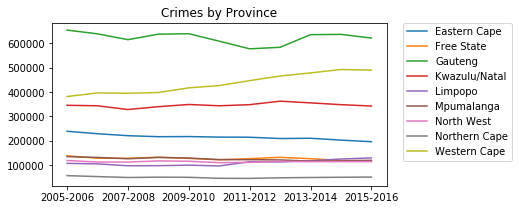

In [33]:
Crimes_Province[list].transpose().plot(kind='line',figsize=(6, 3))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Crimes by Province')

Text(0.5, 1.0, 'Number of Crimes per province')

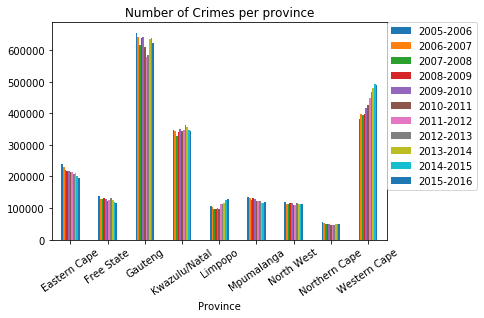

In [34]:
Crimes_Province.plot(kind='bar', rot=35)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.title('Number of Crimes per province')

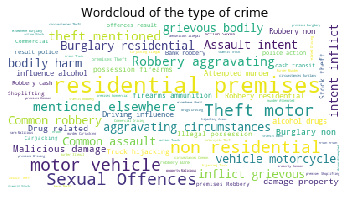

In [35]:
from wordcloud import WordCloud, STOPWORDS

def wordcloud_by_province(province):
    df_new = df[df.Province == province]
    stopwords = set(STOPWORDS)
    stopwords.add("Total")
    stopwords.add("Crime")
    stopwords.add("Crimes")
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 0).generate(" ".join([i for i in df_new['Category']]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Wordcloud of the type of crime")

wordcloud_by_province('Gauteng')

In [36]:
df['Category'].unique()

array(['All theft not mentioned elsewhere',
       'Theft out of or from motor vehicle', 'Drug-related crime',
       'Robbery with aggravating circumstances', 'Common assault',
       'Commercial crime', 'Burglary at residential premises',
       'Assault with the intent to inflict grievous bodily harm',
       'Theft of motor vehicle and motorcycle', 'Shoplifting',
       'Malicious damage to property', 'Common robbery',
       'Burglary at non-residential premises', 'Sexual Offences',
       'Driving under the influence of alcohol or drugs', 'Stock-theft',
       'Attempted murder', 'Carjacking',
       'Robbery at non-residential premises',
       'Robbery at residential premises', 'Murder',
       'Illegal possession of firearms and ammunition', 'Arson',
       'Truck hijacking', 'Robbery of cash in transit', 'Bank robbery',
       'Sexual offences as result of police action'], dtype=object)

In [37]:
df['Province'].unique()

array(['Western Cape', 'Gauteng', 'Free State', 'North West',
       'Kwazulu/Natal', 'Mpumalanga', 'Eastern Cape', 'Limpopo',
       'Northern Cape'], dtype=object)

Text(0.5, 0, 'South African Provinces')

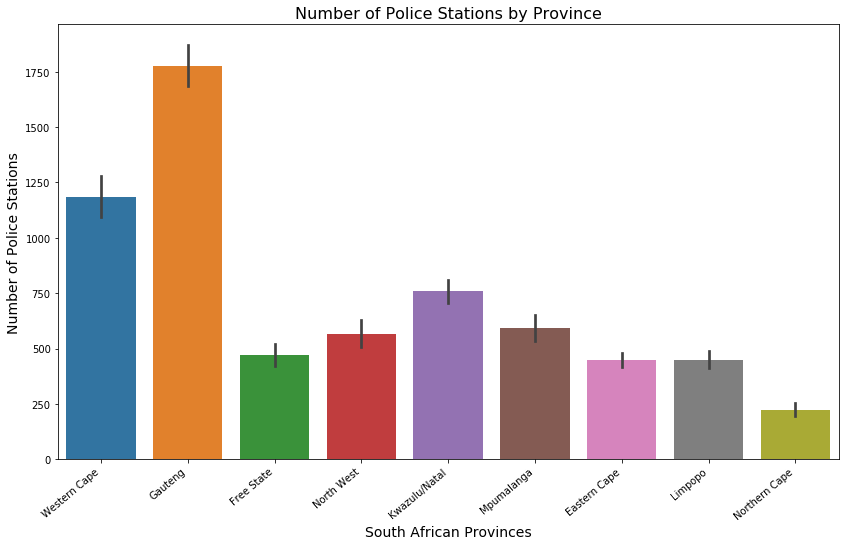

In [38]:
plt.figure(figsize=(14,8)) # this creates a figure 14 inch wide, 8 inch high
ax = sb.barplot(data=df,x='Province',y='Total')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10,)
ax.set_title('Number of Police Stations by Province',fontsize=16)
ax.set_ylabel('Number of Police Stations',fontsize=14)
ax.set_xlabel('South African Provinces',fontsize=14)

In [39]:
df.head()

,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,Total
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176,61631
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,6093,4602,3761,3610,3267,3037,2886,2638,2809,3050,2434,38187
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635,60624
3,Free State,Park Road,All theft not mentioned elsewhere,5108,4282,3834,3316,3101,3013,2679,3116,2927,2297,2103,35776
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,5099,4536,3309,2694,2616,2606,2635,3226,3246,2892,3030,35889


In [45]:
cdf.head()

,Province,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
0,Western Cape,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176
1,Gauteng,All theft not mentioned elsewhere,6093,4602,3761,3610,3267,3037,2886,2638,2809,3050,2434
2,Western Cape,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635
3,Free State,All theft not mentioned elsewhere,5108,4282,3834,3316,3101,3013,2679,3116,2927,2297,2103
4,Gauteng,All theft not mentioned elsewhere,5099,4536,3309,2694,2616,2606,2635,3226,3246,2892,3030
